<a href="https://colab.research.google.com/github/Omorusi/Neural-network/blob/main/Basic_ANN(Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [88]:
# Set random seed for reproducibility
np.random.seed(7)

In [89]:
# Load dataset
data = pd.read_csv("/content/dataset (1).csv")

# Separate features and target
X = data.drop(columns=['target'])
Y = data['target']


In [90]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=7)


In [91]:
# Function to create and train a model with Tanh activation function
def train_model():
    model = Sequential([
        Dense(16, input_dim=13, activation='tanh'),  # Increased to 16 neurons
        Dense(12, activation='tanh'),
        Dense(10, activation='tanh'),
        Dense(8, activation='tanh'),
        Dense(6, activation='tanh'),
        Dense(4, activation='tanh'),
        Dense(2, activation='tanh'),
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=10, verbose=0)

    return model, history


In [92]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 75.41%


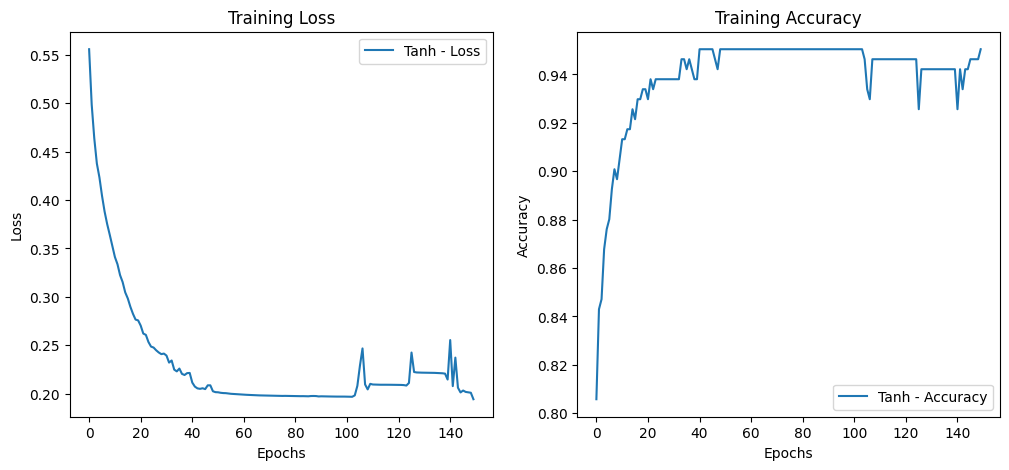

In [93]:

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Tanh - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Tanh - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()
